In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [6]:
cars = pd.read_csv('data/auto_mpg.csv')
cars.shape

(392, 7)

### Target: 'mpg'
### Origin: categorical feature

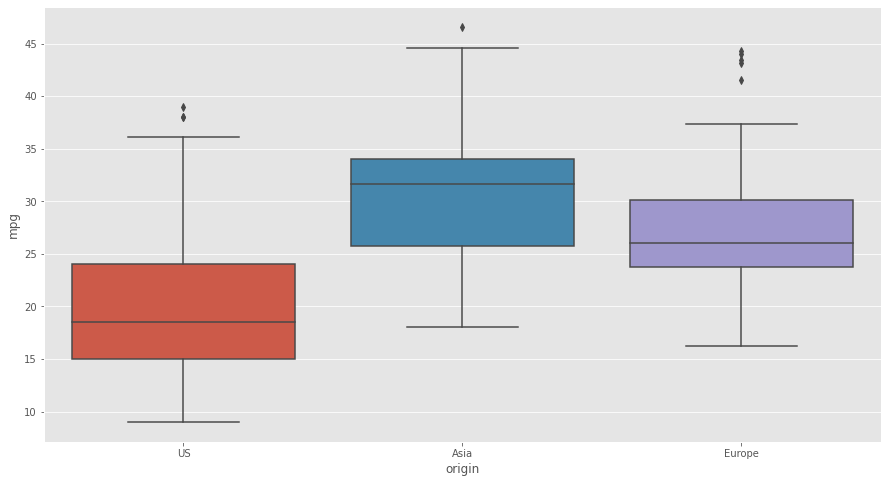

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x='origin', y='mpg', data=cars)
plt.show()

In [15]:
df_origin = pd.get_dummies(cars)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [16]:
#drop origin_asia column to avoid redundancy
df_origin = df_origin.drop('origin_Asia', axis=1)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


In [17]:
X = df_origin.drop('mpg', axis=1).values
y = df_origin.mpg.values

### We can now fit models as before 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#instantiate and fit all in one line
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

ridge.score(X_test, y_test)

0.7190645190217895

# Handling Missing Data

### Using PIMA Indians dataset 

In [19]:
df = pd.read_csv('data/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### insulin, bmi and triceps == 0 is nonsensical.  This data must be missing. 

In [23]:
#replace 0's in insulin, bmi and triceps with NaN
df['triceps'].replace(0, np.nan, inplace=True)
df['insulin'].replace(0, np.nan, inplace=True)
df['bmi'].replace(0, np.nan, inplace=True)

In [24]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


# Imputing Missing Data
* make an educated guess about the missing data
    * ex: using the mean of the non-missing data

In [39]:
X = df.drop('diabetes', axis=1).values
y = df.diabetes.values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [32]:
from sklearn.impute import SimpleImputer

In [41]:
#instantiate imputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#fit imp to the data
imp.fit(X)
X = imp.transform(X)

### Imputers are transformers 
### We can impute then transform and fit a model to the data at once using Pipeline

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#instantiate regressor
logreg = LogisticRegression(max_iter=1000)

#create pipeline object
steps = [['imputation', imp], ('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#fit pipeline to the training set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
pipeline.score(X_test, y_test)

0.7229437229437229

# Centering and Scaling 

# Wine Dataset 

In [200]:
df = pd.read_csv('data/red_wine_quality.csv', delimiter=';')

In [201]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [202]:
df.loc[df['quality'] < 5, 'quality'] = 1
df.loc[df['quality'] >= 5, 'quality'] = 0

In [203]:
df.drop(['volatile acidity', 'citric acid', 'residual sugar',
       'chlorides'], axis=1, inplace=True)


### Why scale your data?
* Many models use some fom of distance to inform them
* Features on larger scales can unduly influence the model
* Example: k-NN uses distance explicitly when making predictions 
* For this reason we want features to be on a similar scales
### Ways to Normalize (scaling or centering):
* Standardization: 
    * Given any column, subtract the mean and divide by the variance
    * so that all features are centered around ZERO and have variance of 1
* Subtract the minimum and divide by the range of the data
    * this will make it so that all values are within 0 and 1
* Normalize so that the data ranges from -1 to 1

## Example:

In [204]:
X = df.drop('quality', axis=1).values
y = df.quality.values

In [205]:
from sklearn.preprocessing import scale

In [206]:
X_scaled = scale(X, with_mean=True)

In [207]:
np.mean(X), np.std(X)

(12.29304904315197, 19.77975029339097)

In [208]:
np.mean(X_scaled), np.std(X_scaled)

(-4.401771937604337e-15, 1.0)

### We can now build a pipeline 

In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [210]:
accuracy_score(y_test, y_pred)

0.946875

### Without scaling:

In [211]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)

0.946875

### CV and Scaling in a Pipeline 

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

# tune the KNN model by feeding a range of values to try
parameters = {'knn__n_neighbors': np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [213]:
cv.best_params_

{'knn__n_neighbors': 2}

In [214]:
cv.score(X_test, y_test)

0.946875

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       303
           1       0.00      0.00      0.00        17

    accuracy                           0.95       320
   macro avg       0.47      0.50      0.49       320
weighted avg       0.90      0.95      0.92       320



/Users/adam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adam/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
